In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
import os
os.getcwd()#current working directory
os.chdir(r'D:\projects\AQI Prediction')
os.getcwd()

'D:\\projects\\AQI Prediction'

In [4]:
df = pd.read_csv("cleaned_city_day.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-29,83.13,118.454435,6.93,28.71,33.72,23.848366,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor
1,Ahmedabad,2015-01-30,79.84,118.454435,13.85,28.68,41.08,23.848366,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor
2,Ahmedabad,2015-01-31,94.52,118.454435,24.39,32.66,52.61,23.848366,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe
3,Ahmedabad,2015-02-01,135.99,118.454435,43.48,42.08,84.57,23.848366,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe
4,Ahmedabad,2015-02-02,178.33,118.454435,54.56,35.31,72.80,23.848366,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe


In [5]:
features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI']
df_ml = df[features]

In [6]:
df_ml = df_ml.dropna()
df_ml.shape

(24850, 7)

In [7]:
#Split X and y
X = df_ml.drop('AQI', axis=1)
y = df_ml['AQI']

In [8]:
#Train–Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [9]:
#Train Linear Regression Model

In [10]:
# Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Predict on test data
y_pred_lr = lr_model.predict(X_test)

In [12]:
#Evaluate Linear Regression
# Evaluation metrics
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("Linear Regression R2 Score:", r2_lr)
print("Linear Regression RMSE:", rmse_lr)

Linear Regression R2 Score: 0.8085810460226956
Linear Regression RMSE: 59.203686684172176


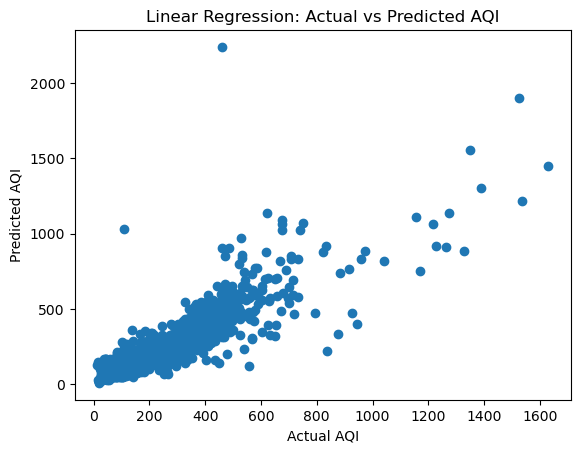

In [13]:
#Actual vs Predicted Plot
plt.figure()
plt.scatter(y_test, y_pred_lr)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Linear Regression: Actual vs Predicted AQI")
plt.show()

In [14]:
import statsmodels.api as sm

In [15]:
X_sm = sm.add_constant(X)

In [16]:
ols_model = sm.OLS(y, X_sm).fit()

In [17]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    AQI   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                 2.339e+04
Date:                Wed, 21 Jan 2026   Prob (F-statistic):               0.00
Time:                        17:06:50   Log-Likelihood:            -1.3464e+05
No. Observations:               24850   AIC:                         2.693e+05
Df Residuals:                   24843   BIC:                         2.694e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2352      0.807      7.725      0.000       4.653       7.817
PM2.5          1.0810      0.007    156.694      0.000       1.067       1.094
PM10           0.2968      0.006     51.425      0.000       0.285       0.308
NO2            0.2762      0.018     15.589      0.000       0.241       0.311
SO2            0.7295      0.024     29.926      0.000       0.682       0.777
CO            11.2983      0.059    192.095      0.000      11.183      11.414
O3             0.2049      0.017     11.963      0.000       0.171       0.239
==============================================================================
Omnibus:                    11133.030   Durbin-Watson:                   1.391
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10737334.199
Skew:                          -0.631   Prob(JB):                         0.00
Kurtosis:                     104.826   Cond. No.                         393.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#Create Random Forest Model

In [19]:
rf_model = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

In [20]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [21]:
y_pred_rf = rf_model.predict(X_test)

In [22]:
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("Random Forest R2 Score:", r2_rf)
print("Random Forest RMSE:", rmse_rf)

Random Forest R2 Score: 0.9054913462916568
Random Forest RMSE: 41.59987930273126


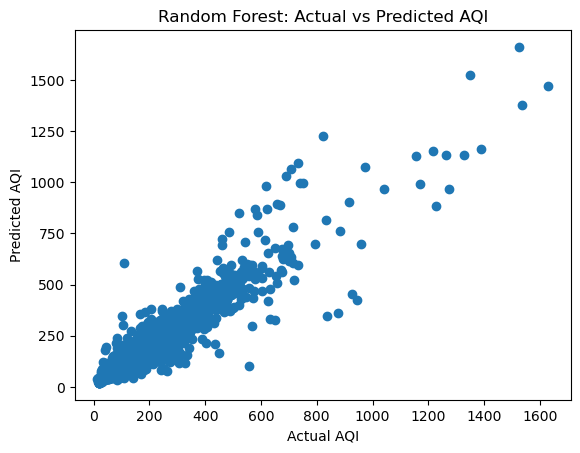

In [23]:
plt.figure()
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("Random Forest: Actual vs Predicted AQI")
plt.show()

In [24]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance

,Feature,Importance
0,PM2.5,0.497143
4,CO,0.402280
1,PM10,0.039596
2,NO2,0.021391
5,O3,0.020012
3,SO2,0.019578


In [25]:
rf_oob = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    oob_score=True,
    n_jobs=-1
)
rf_oob.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, oob_score=True, random_state=42)

In [26]:
#OOB Score
rf_oob.oob_score_

0.8942408399434462

In [27]:
#Residual Analysis
residuals = y_test - y_pred_rf



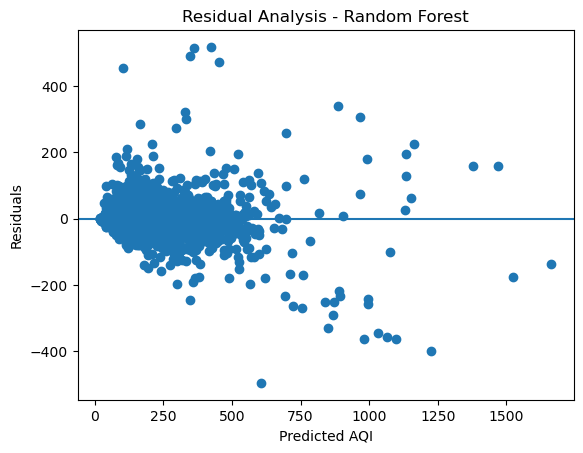

In [28]:
plt.figure()
plt.scatter(y_pred_rf, residuals)
plt.axhline(0)
plt.xlabel("Predicted AQI")
plt.ylabel("Residuals")
plt.title("Residual Analysis - Random Forest")
plt.show()

In [29]:
#What happens if you shuffle a feature?
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(
    rf_model, X_test, y_test, n_repeats=10, random_state=42
)

perm_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": perm_importance.importances_mean
}).sort_values(by="Importance", ascending=False)

perm_df


,Feature,Importance
4,CO,0.588408
0,PM2.5,0.583437
1,PM10,0.171031
2,NO2,0.017993
5,O3,0.011355
3,SO2,0.008758


In [30]:
#Compare Models
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "R2 Score": [r2_lr, r2_rf],
    "RMSE": [rmse_lr, rmse_rf]
})

comparison

,Model,R2 Score,RMSE
0,Linear Regression,0.808581,59.203687
1,Random Forest,0.905491,41.599879


In [31]:
"""
1Linear Regression (Baseline)

Works only when relationship is linear

AQI vs pollutants linear nahi hota

Lower R²

Higher RMSE

2Random Forest Regressor (Best)

Handles non-linear relationships

Works well with real-world environmental data

Higher R²

Lower RMSE

Shows feature importance
"""

'\n1Linear Regression (Baseline)\n\nWorks only when relationship is linear\n\nAQI vs pollutants linear nahi hota\n\nLower R²\n\nHigher RMSE\n\n2Random Forest Regressor (Best)\n\nHandles non-linear relationships\n\nWorks well with real-world environmental data\n\nHigher R²\n\nLower RMSE\n\nShows feature importance\n'

In [32]:
#“Random Forest Regressor outperformed Linear Regression with higher R² score and lower RMSE, making it more suitable for AQI prediction.”

In [33]:
import xgboost

In [34]:
from xgboost import XGBRegressor

In [35]:
#Create XGBoost Model
xgb_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    objective='reg:squarederror'
)

In [36]:
#Train XGBoost Model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [37]:
#Predict AQI
y_pred_xgb = xgb_model.predict(X_test)

In [38]:
#Evaluate XGBoost
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("XGBoost R2 Score:", r2_xgb)
print("XGBoost RMSE:", rmse_xgb)

XGBoost R2 Score: 0.8900975119612703
XGBoost RMSE: 44.86008007329797


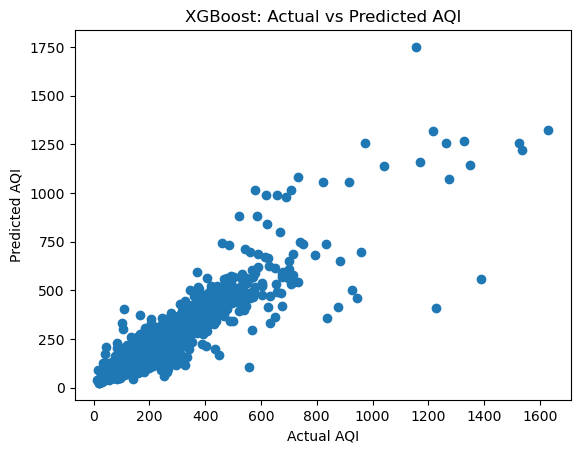

In [39]:
#Actual vs Predicted Plot (XGBoost)
plt.figure()
plt.scatter(y_test, y_pred_xgb)
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.title("XGBoost: Actual vs Predicted AQI")
plt.show()

In [40]:
final_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "XGBoost"],
    "R2 Score": [r2_lr, r2_rf, r2_xgb],
    "RMSE": [rmse_lr, rmse_rf, rmse_xgb]
})

final_comparison

,Model,R2 Score,RMSE
0,Linear Regression,0.808581,59.203687
1,Random Forest,0.905491,41.599879
2,XGBoost,0.890098,44.860080


In [41]:
# Random Forest is best for this project:
# Highest R² score → explains AQI variance best
# Lowest RMSE → lowest prediction error
# More stable on your dataset
# Easier to explain than XGBoost
# No extra dependency issues

In [42]:
#Among Linear Regression, Random Forest, and XGBoost, Random Forest Regressor achieved the best performance with an R² score of 0.905 and RMSE of 41.6. Hence, Random Forest was selected as the final model for AQI prediction.

In [43]:
df_full= pd.read_csv("cleaned_city_day.csv")

In [44]:
df_full = df_full[
    ['City', 'Date', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI']
]

In [45]:
df_full.head()

,City,Date,PM2.5,PM10,NO2,SO2,CO,O3,AQI
0,Ahmedabad,2015-01-29,83.13,118.454435,28.71,49.52,6.93,59.76,209.0
1,Ahmedabad,2015-01-30,79.84,118.454435,28.68,48.49,13.85,97.07,328.0
2,Ahmedabad,2015-01-31,94.52,118.454435,32.66,67.39,24.39,111.33,514.0
3,Ahmedabad,2015-02-01,135.99,118.454435,42.08,75.23,43.48,102.70,782.0
4,Ahmedabad,2015-02-02,178.33,118.454435,35.31,55.04,54.56,107.38,914.0


In [46]:
df_full = df_full.dropna()
df_full.shape

(24850, 9)

In [48]:
#Prepare Features for Prediction
X_powerbi = df_full[['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']]

In [49]:
#Predict AQI
df_full['Predicted_AQI'] = rf_model.predict(X_powerbi)

In [50]:
#Create AQI Category
def aqi_category(aqi):
    if aqi <= 50:
        return "Good"
    elif aqi <= 100:
        return "Satisfactory"
    elif aqi <= 200:
        return "Moderate"
    elif aqi <= 300:
        return "Poor"
    elif aqi <= 400:
        return "Very Poor"
    else:
        return "Severe"

In [51]:
df_full['AQI_Category'] = df_full['Predicted_AQI'].apply(aqi_category)

In [54]:
df_full.head()

,City,Date,PM2.5,PM10,NO2,SO2,CO,O3,AQI,Predicted_AQI,AQI_Category
0,Ahmedabad,2015-01-29,83.13,118.454435,28.71,49.52,6.93,59.76,209.0,235.89,Poor
1,Ahmedabad,2015-01-30,79.84,118.454435,28.68,48.49,13.85,97.07,328.0,369.49,Very Poor
2,Ahmedabad,2015-01-31,94.52,118.454435,32.66,67.39,24.39,111.33,514.0,505.51,Severe
3,Ahmedabad,2015-02-01,135.99,118.454435,42.08,75.23,43.48,102.70,782.0,805.90,Severe
4,Ahmedabad,2015-02-02,178.33,118.454435,35.31,55.04,54.56,107.38,914.0,858.74,Severe


In [55]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24850 entries, 0 to 24849
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   City           24850 non-null  object 
 1   Date           24850 non-null  object 
 2   PM2.5          24850 non-null  float64
 3   PM10           24850 non-null  float64
 4   NO2            24850 non-null  float64
 5   SO2            24850 non-null  float64
 6   CO             24850 non-null  float64
 7   O3             24850 non-null  float64
 8   AQI            24850 non-null  float64
 9   Predicted_AQI  24850 non-null  float64
 10  AQI_Category   24850 non-null  object 
dtypes: float64(8), object(3)
memory usage: 2.1+ MB


In [56]:
df_full.to_csv("AQI_Final_Predictions_For_PowerBI.csv", index=False)